### Project Objective

Build a model to predict whether a customer will make a purchase based on their browsing behavior on an e-commerce website

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [5]:
df = pd.read_csv("online_shoppers_intention.csv")

In [7]:
df.shape

(12330, 18)

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [10]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Data Descriptions

The numeric variables are:

- Administrative: Number of pages visited by the visitor about account management

- Administrative Duration: Total amount of time (in seconds) spent by the visitor on account management related pages

- Informational: Number of pages visited by the visitor about Web site, communication and address information of the shopping site

- Informational Duration: Total amount of time (in seconds) spent by the visitor on informational pages

- Product Related: Number of pages visited by visitor about product related pages

- Product-Related Duration: Total amount of time (in seconds) spent by the visitor on product related pages

- Bounce Rate: Average bounce rate value of the pages visited by the visitor

- Exit Rate: Average exit rate value of the pages visited by the visitor

- Page Value: Average page value of the pages visited by the visitor

- Special Day: Closeness of the site visiting time to a special day

The categorical variables are:

- Operating system: Operating system of the visitor

- Browser: Browser of the visitor

- Region: Geographic region from which the session has been started by the visitor

- Traffic type: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)

- Visitor type: Whether the visitor is a New Visitor, a Returning Visitor or Other

- Weekend: Whether the date of the visit is weekend

- Month: Month of the visit

- Revenue: Whether the visit has been finalized with a transaction

### Checking for data completeness

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

No null data in the dataset

### Checking for Correlations

#### Purchase decision

<Axes: >

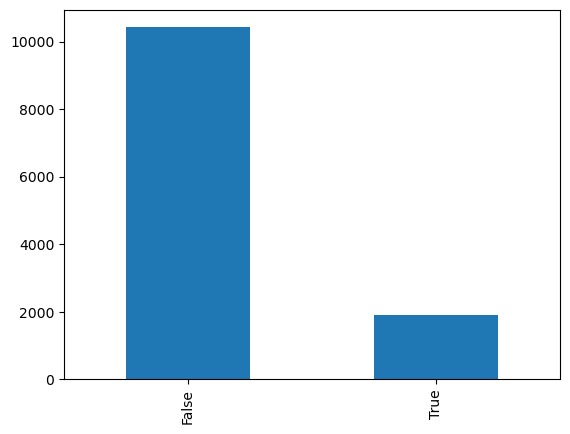

In [29]:
df['Revenue'].value_counts().plot(kind = 'bar')

#### Visitor Type

<Axes: xlabel='VisitorType', ylabel='Purchased%'>

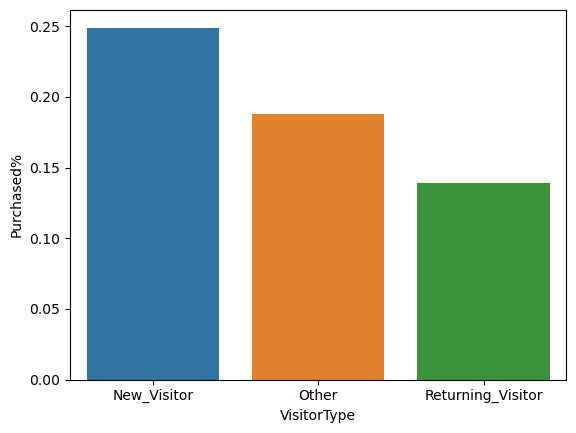

In [49]:
df_plot = df.groupby('VisitorType').agg({'Revenue':'sum','Month':'count'}).rename(columns = {'Revenue':'Purchased','Month':'Visitors'}).reset_index()

df_plot['Purchased%'] = df_plot['Purchased']/df_plot['Visitors']

sns.barplot(data = df_plot,x = 'VisitorType',y = 'Purchased%')

The new visitors have the highest percentage of purchases. So this is an important data field which has to be included for purchase prediction

<Axes: xlabel='Weekend', ylabel='Purchased%'>

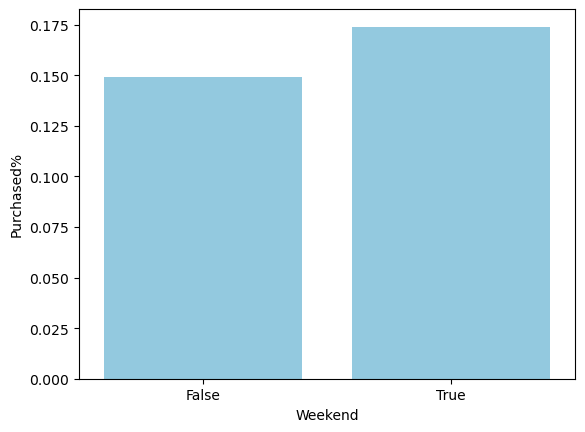

In [91]:
df_plot = df.groupby('Weekend').agg({'Revenue':'sum','Month':'count'}).rename(columns = {'Revenue':'Purchased','Month':'Visitors'}).reset_index()

df_plot['Purchased%'] = df_plot['Purchased']/df_plot['Visitors']

sns.barplot(data = df_plot,x = 'Weekend',y = 'Purchased%',color = 'skyblue')

<Axes: xlabel='Region', ylabel='Purchased%'>

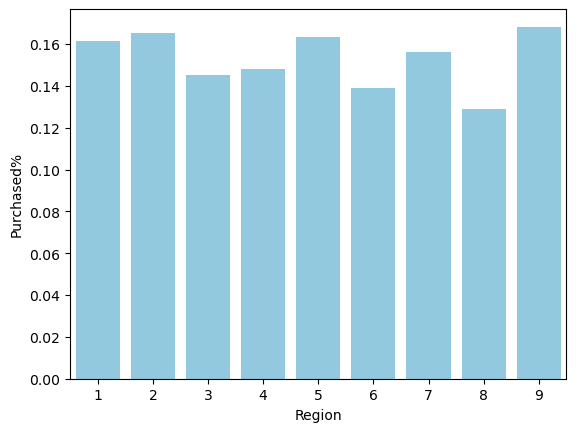

In [90]:
df_plot = df.groupby('Region').agg({'Revenue':'sum','Month':'count'}).rename(columns = {'Revenue':'Purchased','Month':'Visitors'}).reset_index()

df_plot['Purchased%'] = df_plot['Purchased']/df_plot['Visitors']

sns.barplot(data = df_plot,x = 'Region',y = 'Purchased%',color = 'skyblue')

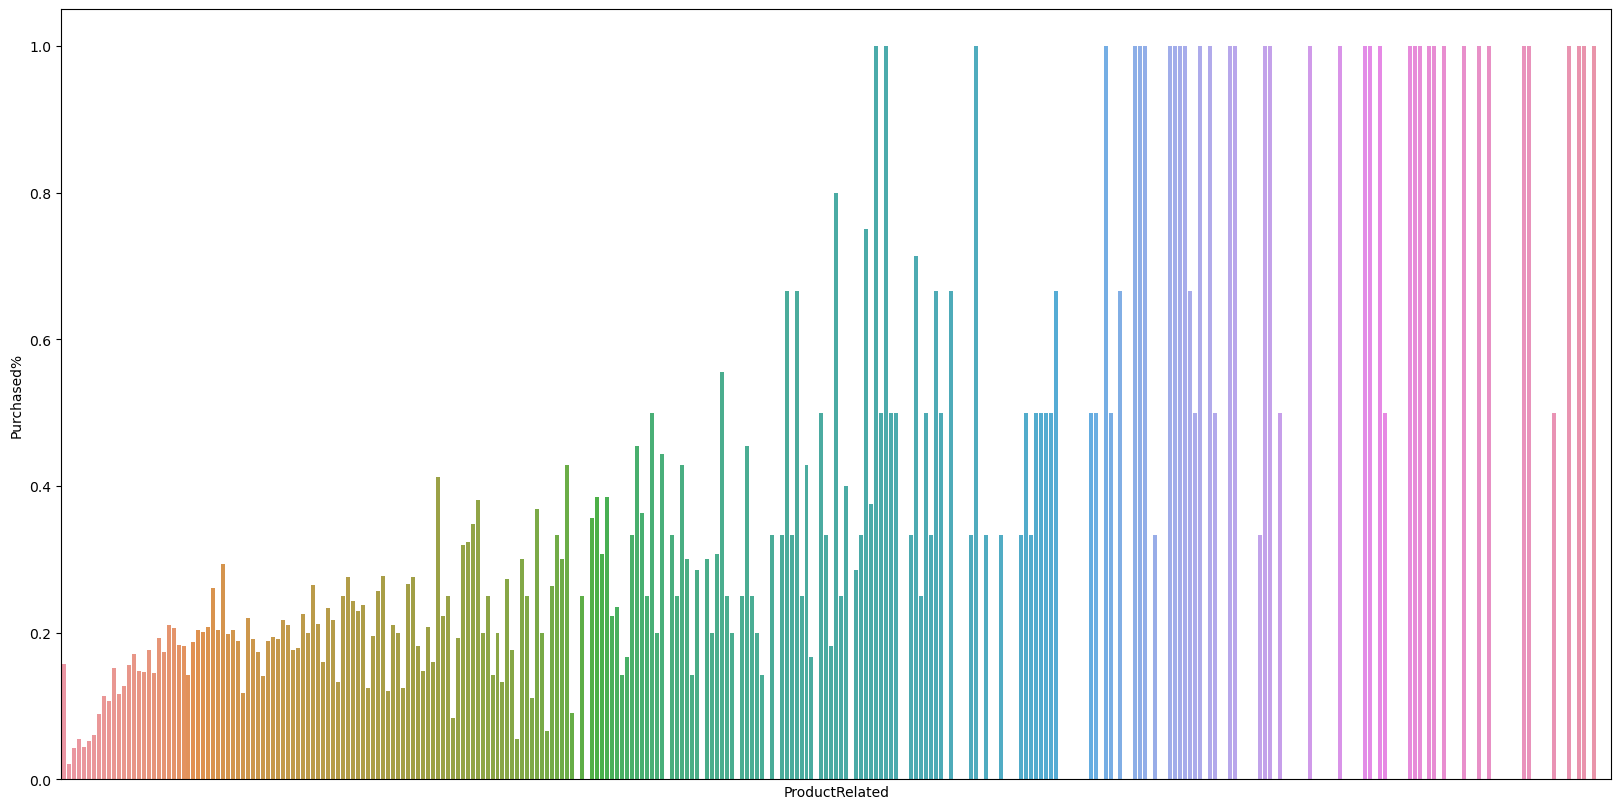

In [58]:
df_plot = df.groupby('ProductRelated').agg({'Revenue':'sum','Month':'count'}).rename(columns = {'Revenue':'Purchased','Month':'Visitors'}).reset_index()

df_plot['Purchased%'] = df_plot['Purchased']/df_plot['Visitors']

plt.figure(figsize = (20,10))
sns.barplot(data = df_plot,x = 'ProductRelated',y = 'Purchased%')
plt.xticks(ticks = [])
plt.show()

Customers having visited more pages have higher probability of purchasing 

#### Purchase probability for different times of the year

<Axes: xlabel='Month', ylabel='Purchased%'>

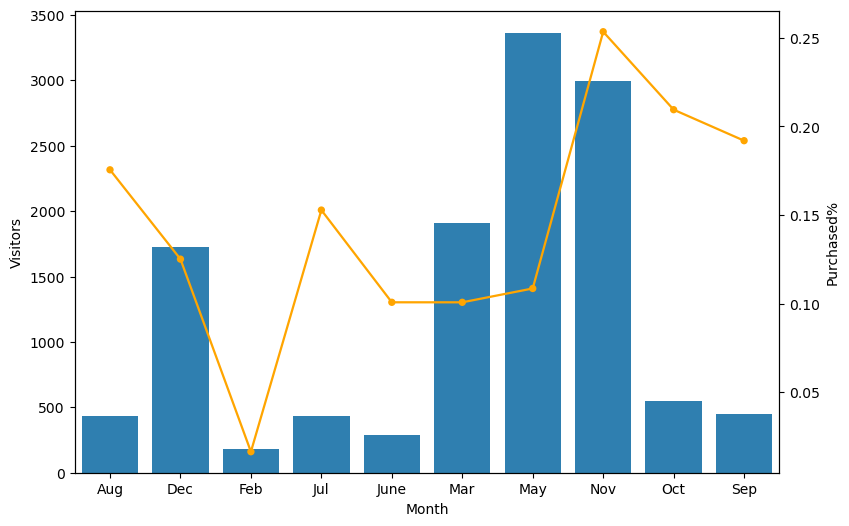

In [77]:
df_plot = df.groupby('Month').agg({'Revenue':'sum','Month':'count'}).rename(columns = {'Revenue':'Purchased','Month':'Visitors'}).reset_index()
df_plot['Purchased%'] = df_plot['Purchased']/df_plot['Visitors']

fig = plt.figure(figsize = (20,6))
fig.add_subplot(121)
sns.barplot(data = df_plot,x = 'Month',y = 'Visitors',color='#1984c5')

ax2 = plt.twinx()
sns.pointplot(data = df_plot,x = 'Month',y = 'Purchased%',linestyles='-',ax = ax2,color = 'orange',scale = 0.6)

End of the year months do better in terms of high purchase conversions

#### BounceRates

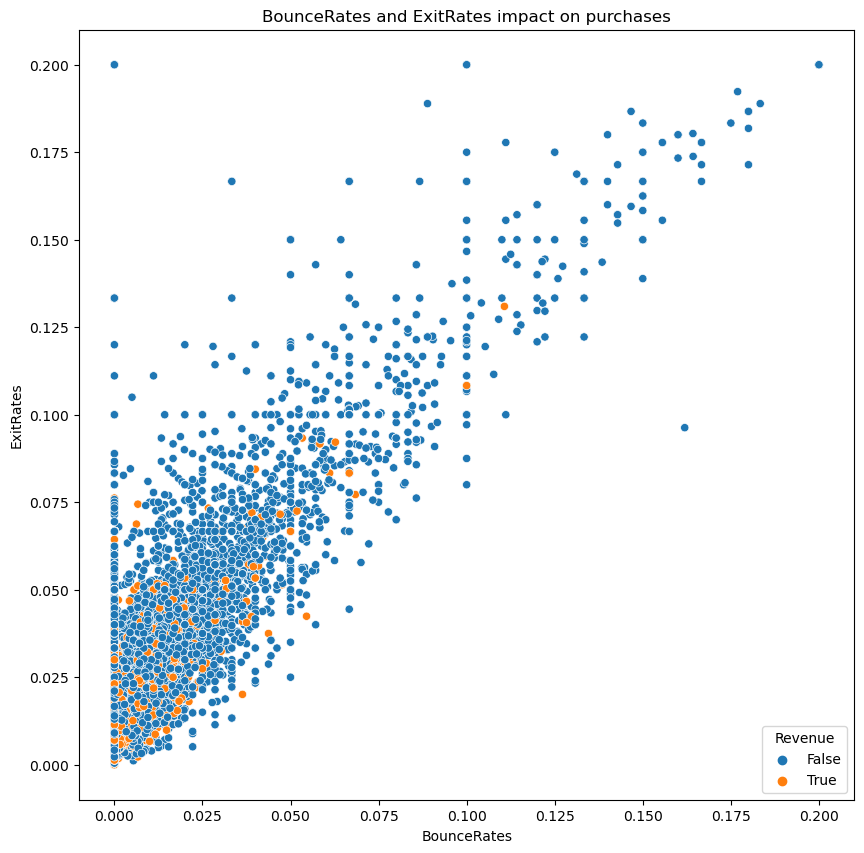

In [85]:
plt.figure(figsize = (10,10))
plt.title("BounceRates and ExitRates impact on purchases")
sns.scatterplot(x = df.BounceRates,y = df.ExitRates,hue = df.Revenue)
plt.show()

In [111]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

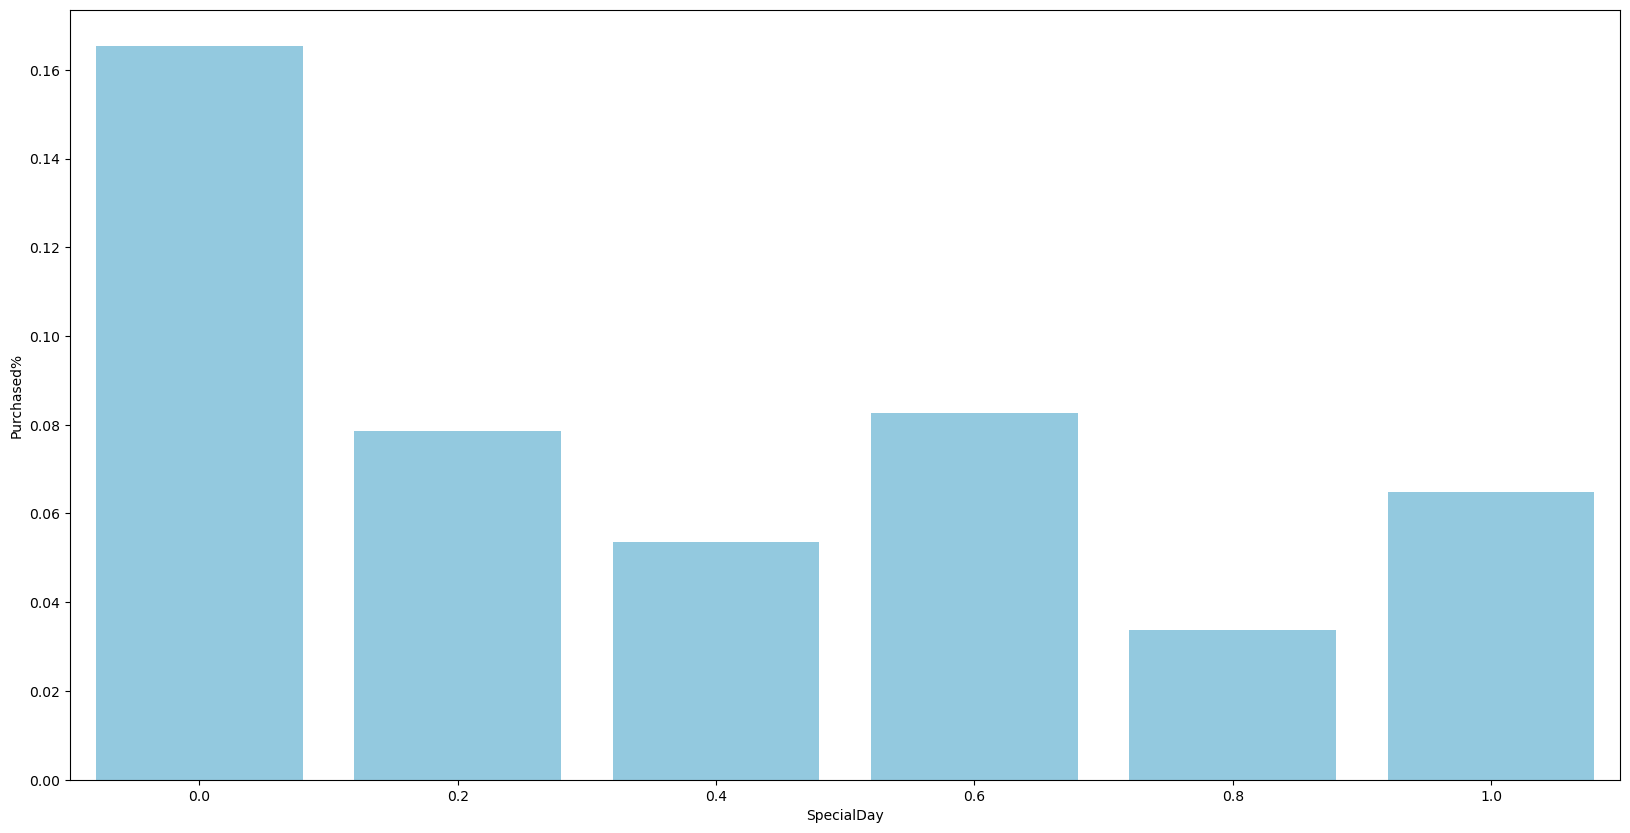

In [115]:
df_plot = df.groupby('SpecialDay').agg({'Revenue':'sum','Month':'count'}).rename(columns = {'Revenue':'Purchased','Month':'Visitors'}).reset_index()

df_plot['Purchased%'] = df_plot['Purchased']/df_plot['Visitors']

plt.figure(figsize = (20,10))
sns.barplot(data = df_plot,x = 'SpecialDay',y = 'Purchased%',color = 'skyblue')
plt.show()

### Feature Engineering

We would be adding the following columns to use in our model
- Admin_DurationAvg
- Inf_DurationAvg
- Prod_DurationAvg

In [118]:
df['Admin_DurationAvg'] = df['Administrative_Duration']/df['Administrative']
df['Inf_DurationAvg'] = df['Informational_Duration']/df['Informational']
df['Prod_DurationAvg'] = df['ProductRelated_Duration']/df['ProductRelated']

In [150]:
df['Admin_DurationAvg'].fillna(0,inplace =True)
df['Inf_DurationAvg'].fillna(0,inplace =True)
df['Prod_DurationAvg'].fillna(0,inplace =True)

In [151]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Admin_DurationAvg', 'Inf_DurationAvg',
       'Prod_DurationAvg'],
      dtype='object')

In [152]:
categorial_columns = ['SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
numerical_columnns = ['PageValues','Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues','Revenue','Admin_DurationAvg','Inf_DurationAvg','Prod_DurationAvg']

### Transforming the categorical columns

In [153]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer

In [154]:
transformer = make_column_transformer((OneHotEncoder(),categorial_columns),remainder = 'passthrough')

In [155]:
df_transformed = transformer.fit_transform(df)

In [156]:
df_transformed

<12330x84 sparse matrix of type '<class 'numpy.float64'>'
	with 184643 stored elements in Compressed Sparse Row format>

In [157]:
df_transformed = pd.DataFrame(data = df_transformed.toarray(),columns = transformer.get_feature_names_out())

In [158]:
df_transformed

,onehotencoder__SpecialDay_0.0,onehotencoder__SpecialDay_0.2,onehotencoder__SpecialDay_0.4,onehotencoder__SpecialDay_0.6,onehotencoder__SpecialDay_0.8,onehotencoder__SpecialDay_1.0,onehotencoder__Month_Aug,onehotencoder__Month_Dec,onehotencoder__Month_Feb,onehotencoder__Month_Jul,...,remainder__Informational_Duration,remainder__ProductRelated,remainder__ProductRelated_Duration,remainder__BounceRates,remainder__ExitRates,remainder__PageValues,remainder__Revenue,remainder__Admin_DurationAvg,remainder__Inf_DurationAvg,remainder__Prod_DurationAvg
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,0.000000,0.0,0.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,0.000000,0.0,32.000000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,0.000000,0.0,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,0.000000,0.0,1.333333
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,0.000000,0.0,62.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,48.333333,0.0,33.656447
12326,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,0.000000,0.0,93.150000
12327,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,0.000000,0.0,30.708333
12328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,18.750000,0.0,23.066667


### Model Building

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report

In [162]:
x = df_transformed.drop(columns = 'remainder__Revenue',axis = 1)
y = df_transformed['remainder__Revenue']

In [165]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

#### Logistic Regression

In [168]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [169]:
cross_val_score(logmodel,x_train,y_train,cv = 5,scoring = 'accuracy')

array([0.8768373 , 0.88241257, 0.88494678, 0.88291941, 0.88742394])

In [175]:
y_pred = logmodel.predict(x_train)

accuracy_score(y_train,y_pred)

0.8849351175993512

In [174]:
y_pred_test = logmodel.predict(x_test)

accuracy_score(y_test,y_pred_test)

0.8803730738037308

Model gives high accuracy even on the test dataset

In [176]:
roc_auc_score(y_test,logmodel.predict(x_test))

0.6748060515922862

In [179]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2084
         1.0       0.72      0.38      0.49       382

    accuracy                           0.88      2466
   macro avg       0.81      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



#### Decision Tree Classifier

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
treemodel = DecisionTreeClassifier()

In [182]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [183]:
cross_val_score(treemodel,x_train,y_train,cv = 5,scoring = 'accuracy')

array([0.84541308, 0.84946782, 0.86619361, 0.86467309, 0.86206897])

In [185]:
y_pred_test = treemodel.predict(x_test)

accuracy_score(y_test,y_pred_test)

0.8730738037307381

In [186]:
roc_auc_score(y_test,treemodel.predict(x_test))

0.7624194812633779

In [187]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      2084
         1.0       0.59      0.60      0.60       382

    accuracy                           0.87      2466
   macro avg       0.76      0.76      0.76      2466
weighted avg       0.87      0.87      0.87      2466



#### Random Forest Classifier

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
forestmodel = RandomForestClassifier(max_depth=10)

In [193]:
forestmodel.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [194]:
cross_val_score(forestmodel,x_train,y_train,cv = 5,scoring = 'accuracy')

array([0.89204257, 0.90015205, 0.89863153, 0.89812468, 0.90111562])

In [195]:
y_pred = forestmodel.predict(x_train)

accuracy_score(y_train,y_pred)

0.935117599351176

In [196]:
y_pred_test = forestmodel.predict(x_test)

accuracy_score(y_test,y_pred_test)

0.9006488240064883

In [197]:
roc_auc_score(y_test,forestmodel.predict(x_test))

0.7145956225944871

In [198]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      2084
         1.0       0.84      0.45      0.58       382

    accuracy                           0.90      2466
   macro avg       0.87      0.71      0.76      2466
weighted avg       0.90      0.90      0.89      2466



In [202]:
confusion_matrix(y_test,y_pred_test)

array([[2051,   33],
       [ 212,  170]])

### Conclusion

Decision Tree classifier gives the best results in terms of the good balance ROC score. The accuracy of the Random forest classifier is the highest but the recall for Purchase prediction is very low.